# Examples of How to do plots

## Bar Chart  Example          
Area:
 * matplotlib.pyplot

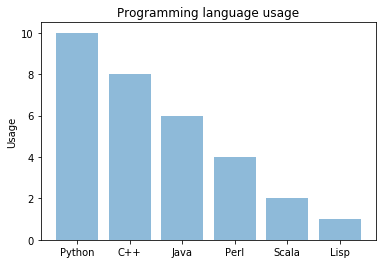

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

**Data distribution plot, PDF(Probability Density Function)**        
Area:       
 * scipy.stats: 

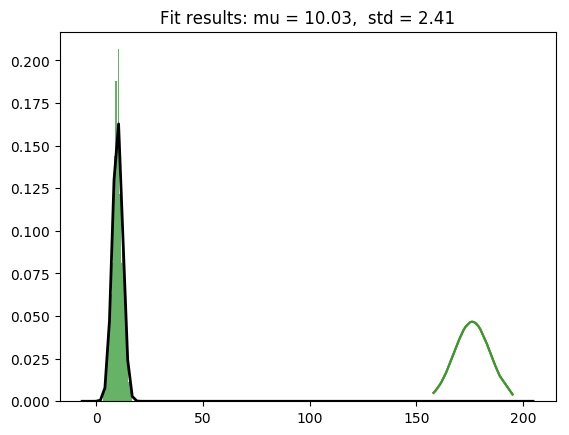

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## **Pandas Plot** 

                A           B           C           D
count  100.000000  100.000000  100.000000  100.000000
mean     0.049325   -0.100132    0.055549   -0.057939
std      0.987514    0.954161    1.118561    0.957127
min     -2.740767   -2.402221   -2.630853   -2.643563
25%     -0.472659   -0.739639   -0.657197   -0.675927
50%      0.030752   -0.009741    0.149005   -0.141218
75%      0.616407    0.475027    0.768756    0.555944
max      2.622979    2.101860    2.877185    2.697521


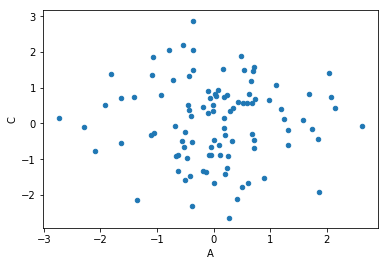

In [15]:
from numpy.random import randn
import pandas as pd

data = pd.DataFrame(randn(100, 4), columns=['A', 'B', 'C', 'D'])
print(data.describe())
#plt = data['A'].plot(kind='line', color='DarkBlue', label='B')
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.plot(kind='scatter',x='A',y='C')

## Seaborn plots

    position  step  walk
0          0     0     0
1          1     1     0
2          1     2     0
3          1     3     0
4          0     4     0
5          0     0     1
6          1     1     1
7          1     2     1
8          2     3     1
9          1     4     1
10         0     0     2
11         1     1     2
12         1     2     2
13         0     3     2
14        -1     4     2
15         0     0     3
16        -1     1     3
17         0     2     3
18         1     3     3
19         2     4     3
20         0     0     4
21        -1     1     4
22        -1     2     4
23        -1     3     4
24        -1     4     4
25         0     0     5
26         0     1     5
27         1     2     5
28         0     3     5
29         1     4     5
..       ...   ...   ...
70         0     0    14
71         0     1    14
72         1     2    14
73         0     3    14
74        -1     4    14
75         0     0    15
76         0     1    15
77        -1     2    15


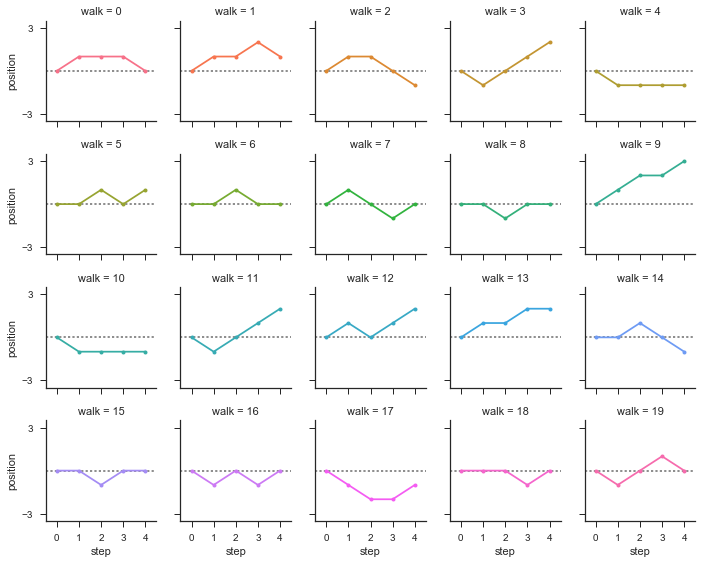

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=2.0)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

print(df)